In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

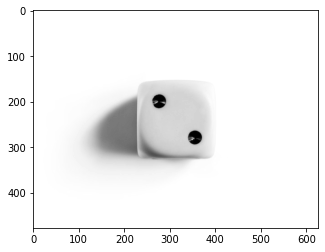

In [22]:
originalImg = cv.imread("image/tas5.jpg")
imgGray = cv.cvtColor(originalImg, cv.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap="gray")

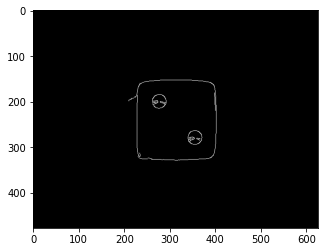

In [23]:
# Setting parameter values
t_lower = 10 # Lower Threshold
t_upper = 250  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv.Canny(imgGray, t_lower, t_upper)
plt.imshow(edge,cmap="gray")


[[355 241  88]
 [271 283  46]]
Number of circles detected: 2


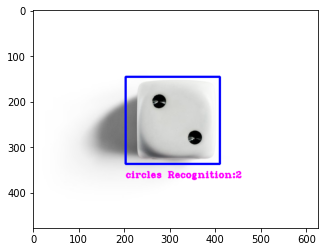

In [24]:
# apply binary and adaptive thresholding
thresh=cv.adaptiveThreshold(edge,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,7,5)

# Taking a matrix of size 9 as the kernel
kernel = np.ones((9,9),np.uint8)

# The first parameter is the original image, kernel is the matrix with which image is
# convolved and third parameter is the number of iterations, which will determine how much
# you want to dilate a given image.
thresh = cv.dilate(thresh,kernel,iterations = 1)

# detect the contours on the binary image using cv.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
# compute the bounding rectangle of the contour
x,y,w,h = cv.boundingRect(contours[0])
dice = thresh[y:y+h,x:x+w]

# draw the bounding rectangle
cv.rectangle(originalImg,(x,y),(x+w,y+h),(0,0,255),4)

# Apply Hough transform on the canny image
circles = cv.HoughCircles(edge,cv.HOUGH_GRADIENT,1.2,90,
                            param1=50,param2=40)
# If some circle is found
if circles is not None:
   # Get the (x, y, r) as integers
   circles = np.round(circles[0, :]).astype("int")
   print(circles)
   # loop over the circles
   #for (x, y, r) in circles:
      #cv.circle(edge, (x, y), r, (255, 0, 0), 1)
      
cv.putText(originalImg,f"circles Recognition:{len(circles)}", (x,y+h+30), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,255),2)
#plt.imshow(originalImg)
plt.imshow(originalImg)
print("Number of circles detected:", len(circles))